In [23]:
import pandas as pd

df = pd.read_csv(r"C:\Users\mmoammar\Downloads\Car_sales.csv")

variable_types = df.dtypes

print("Variable Types:")
print(variable_types)

Variable Types:
Manufacturer            object
Model                   object
Sales_in_thousands     float64
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
dtype: object


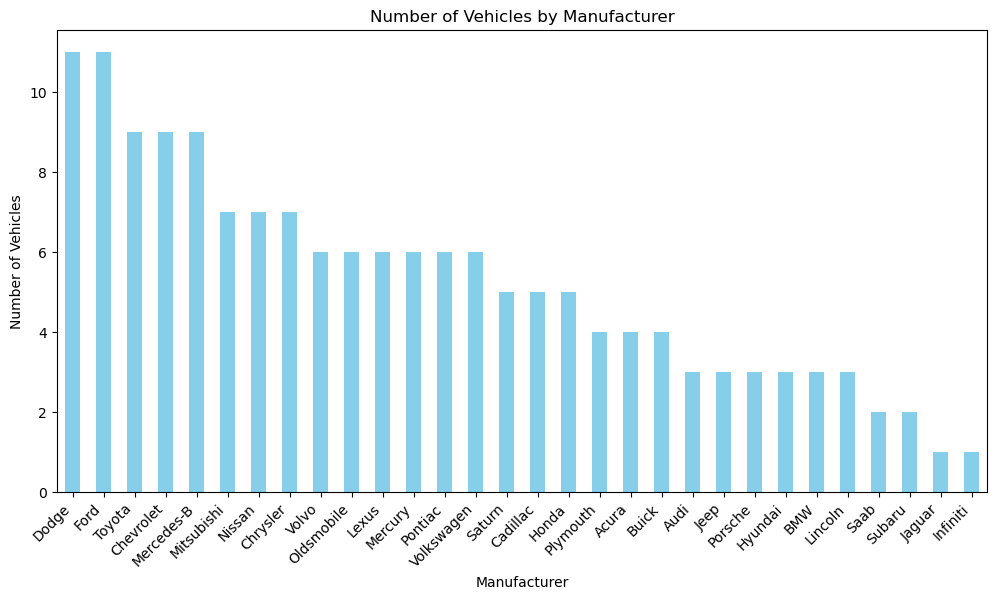

In [24]:
import matplotlib.pyplot as plt

manufacturer_counts = df['Manufacturer'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 6))
manufacturer_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Vehicles by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Vehicles')
plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better visibility
plt.show()


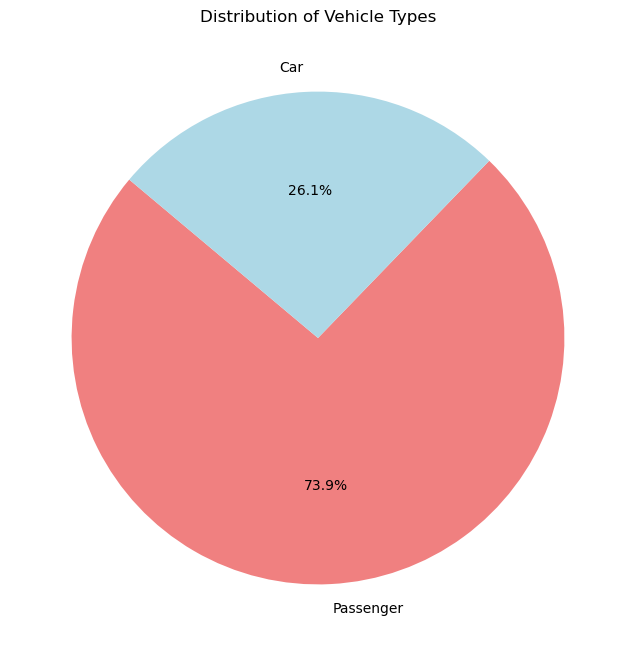

In [25]:
vehicle_type_counts = df['Vehicle_type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Vehicle Types')
plt.show()


In [26]:
# Calculate the average price using the mean function
average_price = df['Price_in_thousands'].mean()

print(f"Average Price of All Cars: ${average_price:.2f}")

Average Price of All Cars: $27.39


In [27]:
# Specify the numerical columns
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

# Calculate variance and standard deviation for each numerical column
variances = df[numerical_columns].var()
std_devs = df[numerical_columns].std()

# Display the results
print("Variance for Numerical Columns:")
print(variances)

print("\nStandard Deviation for Numerical Columns:")
print(std_devs)


Variance for Numerical Columns:
Sales_in_thousands     4628.002257
__year_resale_value     131.180007
Price_in_thousands      205.969949
Engine_size               1.091300
Horsepower             3214.926385
dtype: float64

Standard Deviation for Numerical Columns:
Sales_in_thousands     68.029422
__year_resale_value    11.453384
Price_in_thousands     14.351653
Engine_size             1.044653
Horsepower             56.700321
dtype: float64


In [28]:
# Specify the numerical columns
numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

# Calculate IQR and identify outliers for each numerical column
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Identify outliers
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    
    # Display the results
    print(f"\nColumn: {column}")
    print(f"IQR: {IQR:.2f}")
    print("Identified Outliers:")
    print(outliers)



Column: Sales_in_thousands
IQR: 53.84
Identified Outliers:
    Manufacturer           Model  Sales_in_thousands  __year_resale_value  \
40         Dodge      Ram Pickup             227.061               15.060   
45         Dodge         Caravan             181.749               12.025   
49          Ford          Taurus             245.815               10.055   
50          Ford           Focus             175.670                  NaN   
52          Ford        Explorer             276.747               16.640   
53          Ford        Windstar             155.787               13.175   
55          Ford          Ranger             220.650                7.850   
56          Ford        F-Series             540.561               15.075   
57         Honda           Civic             199.685                9.850   
58         Honda          Accord             230.902               13.210   
69          Jeep  Grand Cherokee             157.040               18.810   
137       Toyota

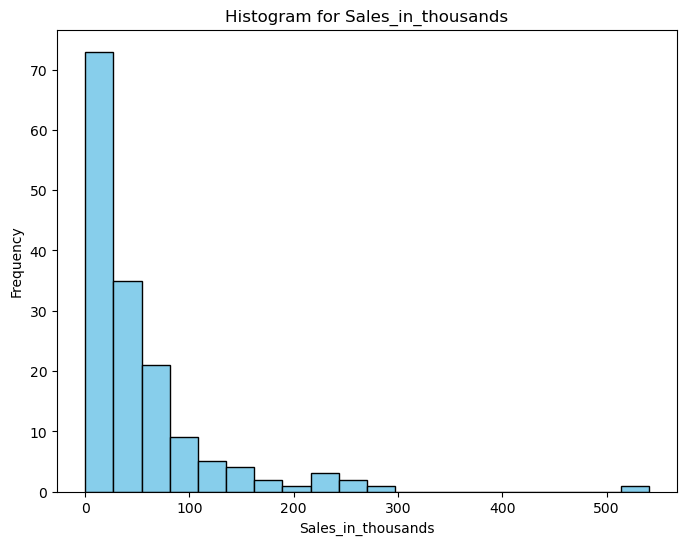


Column: Sales_in_thousands
Skewness: 3.38
Distribution is skewed to the right (long right tail).


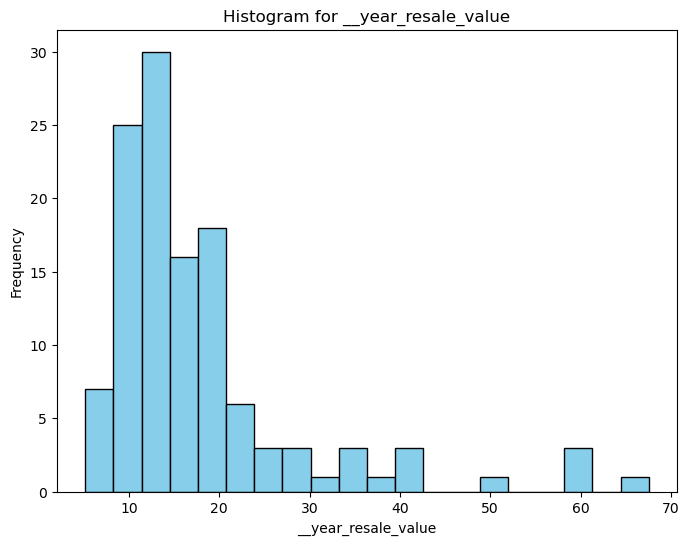


Column: __year_resale_value
Skewness: 2.27
Distribution is skewed to the right (long right tail).


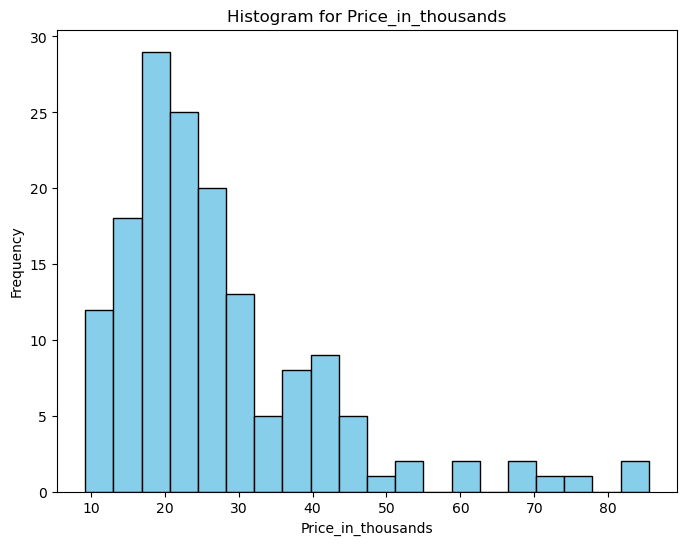


Column: Price_in_thousands
Skewness: 1.75
Distribution is skewed to the right (long right tail).


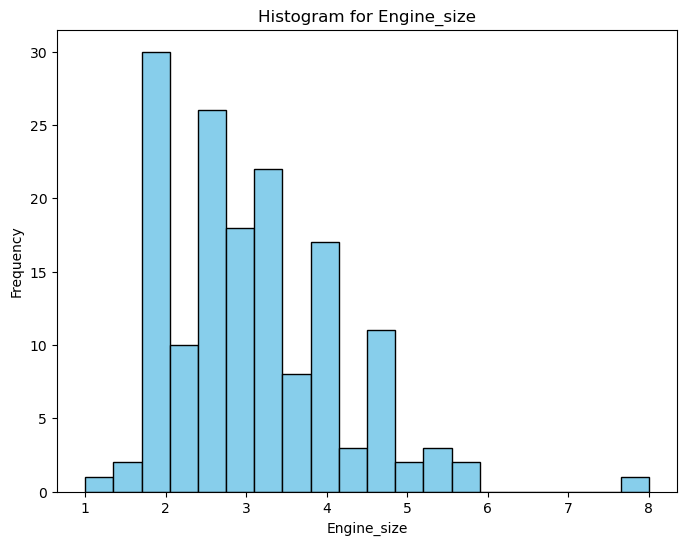


Column: Engine_size
Skewness: 1.09
Distribution is skewed to the right (long right tail).


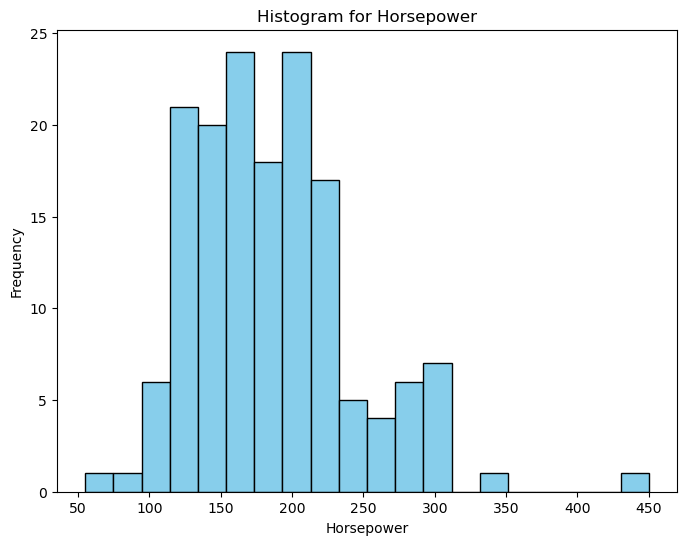


Column: Horsepower
Skewness: 0.99
Distribution is skewed to the right (long right tail).


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew

numerical_columns = ['Sales_in_thousands', '__year_resale_value', 'Price_in_thousands', 'Engine_size', 'Horsepower']

# Plot histograms and calculate skewness for each numerical column
for column in numerical_columns:
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Calculate skewness
    skewness = skew(df[column].dropna())
    
    # Display skewness
    print(f"\nColumn: {column}")
    print(f"Skewness: {skewness:.2f}")
    
    # Interpret skewness
    if skewness == 0:
        print("Distribution is perfectly symmetrical.")
    elif skewness < 0:
        print("Distribution is skewed to the left (long left tail).")
    else:
        print("Distribution is skewed to the right (long right tail).")
